In [1]:
experimento = 'Para kernel RBF y Poly probar diferentes valores de C y gamma.\n'

In [2]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import Modulo_SVM

from time import process_time_ns

from sklearn.svm import SVC
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
#Cargamos el data set
data = pd.read_csv('C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/Jaime/TFG/HuGaDB-master/HuGaDB_v2_Digest/DataFrameFinal.csv')
#Elimino las filas con algún valor de columna vacio 
data = data.dropna()

In [4]:
print(f'\033[5;35m EXPERIMENTO --> {experimento} \033[0;m')

 EXPERIMENTO --> Para kernel RBF y Poly probar diferentes valores de C y gamma.
 


In [5]:
# Hyperparametros
nTest = 0.2

nSamples = 25000

nTrain = 1-nTest
nSamples =  round(nSamples / nTrain)
num_splits = 10
kernels = ['poly','rbf']


In [6]:
df = data
df = df[:nSamples]

In [7]:
# Elimino las clases de las cuales no tengo muestras
# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 9) | (df.act == 12)]

In [8]:
X = df.drop(['act'], axis = 'columns')
y = df.act

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=nTest, random_state=42)

num of samples: 31250
[8613, 1863, 3671, 3237, 2253, 500, 574, 6177, 0, 2427, 1935, 0]


<BarContainer object of 12 artists>

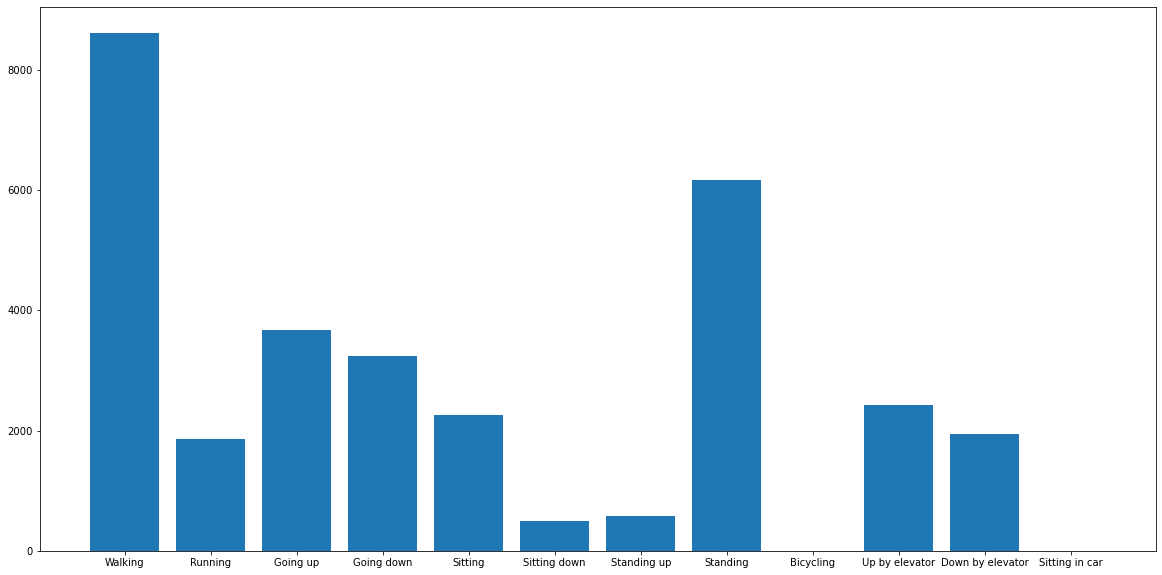

In [11]:
x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
               'Bicycling', 'Up by elevator',  'Down by elevator',  'Sitting in car']
# x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
#             'Up by elevator',  'Down by elevator']
y_values = []
y_values.append((df[(df.act == 1)]).shape[0])
y_values.append((df[(df.act == 2)]).shape[0])
y_values.append((df[(df.act == 3)]).shape[0])
y_values.append((df[(df.act == 4)]).shape[0])
y_values.append((df[(df.act == 5)]).shape[0])
y_values.append((df[(df.act == 6)]).shape[0])
y_values.append((df[(df.act == 7)]).shape[0])
y_values.append((df[(df.act == 8)]).shape[0])
y_values.append((df[(df.act == 9)]).shape[0])
y_values.append((df[(df.act == 10)]).shape[0])
y_values.append((df[(df.act == 11)]).shape[0])
y_values.append((df[(df.act == 12)]).shape[0])
print(f'num of samples: {sum(y_values)}')
print(y_values)
plt.figure(figsize=(20,10))
plt.bar(x_values, y_values, width=0.8)            

In [12]:
# Modelo que entrenaremos 
# model = SVC(C=0.5,kernel = 'poly', degree=3, gamma='scale', coef0= 4, decision_function_shape='ovo'
#             ,shrinking=True, probability=True, verbose = True, random_state=42, cache_size = 600)
# model = SVC(kernel = 'rbf', decision_function_shape='ovo')

Time: 3h 51m 59s
Los mejores parametros para el kernel rbf son: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Accuracy de validación: 0.79808



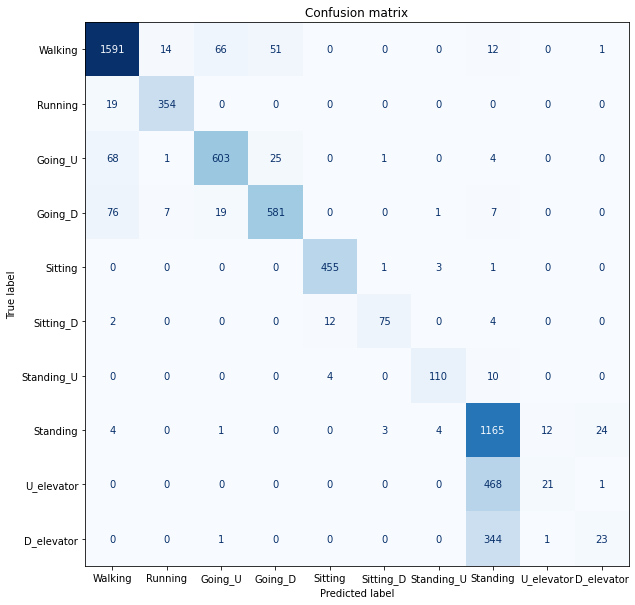

In [15]:
# Optimize Parameters with Cross  Validation and GridSearchCV()
param_grid = [
    {'C' : [0.5, 1, 10, 100],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001], 
     'kernel': ['rbf']}, 
]

optimal_params = GridSearchCV(SVC(), param_grid,cv=10, scoring='accuracy', verbose=0)
t1_start = process_time_ns() 
optimal_params.fit(X_train, y_train)
t1_stop = process_time_ns()
time = (t1_stop-t1_start)/1000000000
time_mean=time

# Muestro el tiempo medio del entrenamiento de mi red neuronal 
if(time_mean> 3600):
    print(f'\033[5;31mTime: {int(time_mean/3600)}h {int((time_mean%3600)/60)}m {round((time_mean%3600)%60)}s\033[0;m')
elif(time_mean> 60):
    print(f'\033[5;31mTime: {int(time_mean /60)}m {time_mean%60}s\033[0;m')
else:
    print(f'\033[5;31mTime: {time_mean}s\033[0;m')

print(f'\033[5;34mLos mejores parametros para el kernel rbf son: {optimal_params.best_params_}\033[0;m')
print(f'\033[5;32mAccuracy de validación: {optimal_params.best_score_}\n\033[0;m')

best_model = optimal_params.best_estimator_
Modulo_SVM.confusion_matrix(best_model,X_test, y_test)